# Pembalakan

EfficientNet-Unet trained on https://github.com/BioWar/Satellite-Image-Segmentation-using-Deep-Learning-for-Deforestation-Detection/tree/main/Dataset

## Checkpoints

All checkpoints can get at https://huggingface.co/malay-huggingface/pembalakan

## Preparation script

All scripts and notebooks can get at https://github.com/malaysia-ai/projects/tree/master/malaysia_ai_projects/pembalakan

## Install necessary requirements

```bash
pip3 install tensorflow>=1.15 malaya-boilerplate==0.0.15 skimage
```

In [1]:
from malaysia_ai_projects import pembalakan

## List available models

In [2]:
pembalakan.available_model()

,Size (MB),Test Loss
efficientnet-b4,79.9,0.11
efficientnet-b4-quantized,20.7,0.11
efficientnet-b2,66.4,0.15
efficientnet-b2-quantized,17.1,0.15


## Load model

```python
def load(model: str = 'efficientnet-b2', **kwargs):
    """
    Load suarakami model.

    Parameters
    ----------
    model : str, optional (default='efficientnet-b2')
        Model architecture supported. Allowed values:

        * ``'efficientnet-b4'`` - EfficientNet B4 + Unet.
        * ``'efficientnet-b4-quantized'`` - EfficientNet B4 + Unet with dynamic quantized.
        * ``'efficientnet-b2'`` - EfficientNet B2 + Unet.
        * ``'efficientnet-b2-quantized'`` - EfficientNet B2 + Unet with dynamic quantized.

    Returns
    -------
    result : malaysia_ai_projects.pembalakan.Model class
    """
```

In [3]:
model = pembalakan.load()

## Predict

```python
def predict(self, inputs: List[np.array]):
    """
    Parameters
    ----------
    input: List[np.array]
        List of np.array, should be size [H, W, 3], `H` and `W` can be dynamic.

    Returns
    -------
    result: List[np.array]
    """
```

In [4]:
from glob import glob

files = glob('example/pembalakan/*.png')
files

['example/pembalakan/perak.png',
 'example/pembalakan/0-114.png',
 'example/pembalakan/0-0.png',
 'example/pembalakan/0-119.png']

In [5]:
from skimage.io import imread

images = []
for f in files:
    images.append(imread(f))

In [6]:
outputs = model.predict(images)
len(outputs)

4

In [7]:
import matplotlib.pyplot as plt

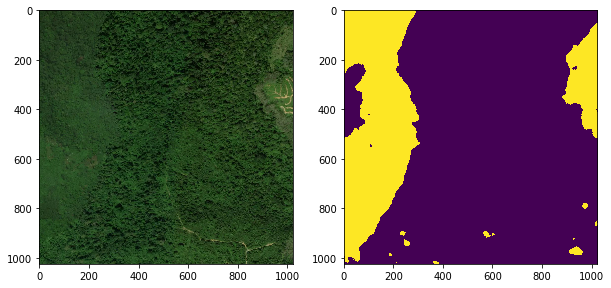

In [8]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(images[0])
plt.subplot(1,2,2)
plt.imshow(outputs[0][:,:,0])

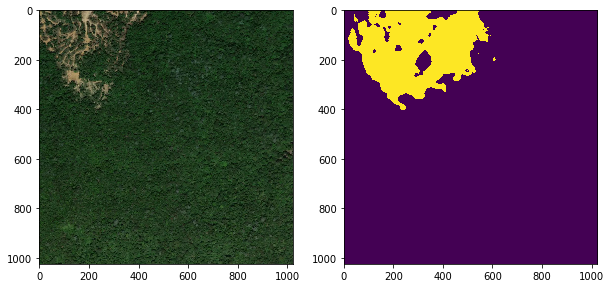

In [9]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(images[1])
plt.subplot(1,2,2)
plt.imshow(outputs[1][:,:,0])

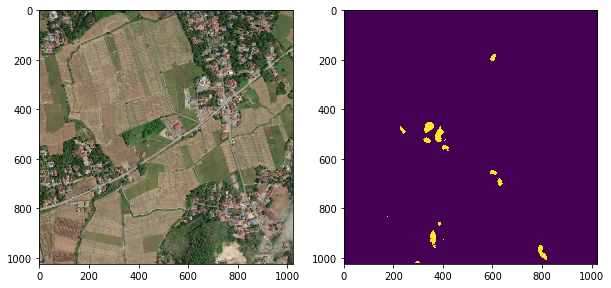

In [10]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(images[2])
plt.subplot(1,2,2)
plt.imshow(outputs[2][:,:,0])

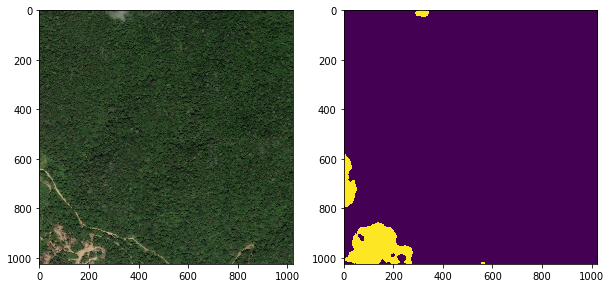

In [11]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(images[3])
plt.subplot(1,2,2)
plt.imshow(outputs[3][:,:,0])

In [12]:
images[3].shape, outputs[3][:,:,0].shape

((1024, 1024, 3), (1024, 1024))

## Calculate area of segmentation in km^2

### pixel to meter ratio

https://wiki.openstreetmap.org/wiki/Zoom_levels,

Stile = (C ∙ cos(latitude) / (2 ^ zoomlevel)) / size image

C = 40075016.686

malaysia latitude = 3.140853

zoomlevel = 15

I just take center of malaysia latitude, to get accurate result, take the actual latitude from the satellite image.

In [15]:
import math
import numpy as np

C = 40075016.686
malaysia_lat = 3.140853
per_pixel = np.abs(C * np.cos(malaysia_lat) / (2**15)) / 1024
per_pixel

1.194328240267381

So we know 1 pixel = 1.19m,

pixel = 1.19m

pixel^2 = 1.19m * 1.19m

pixel^2 = 1.4161m^2

pixel^2 / 1.4161 = m^2

Now, get total segmentation in term of pixels,

In [20]:
total_pixel = (outputs[3][:,:,0] > 0).sum()
pixel_square = np.sqrt(total_pixel)
pixel_square

193.92524332845377

In [23]:
km_square = (pixel_square / (per_pixel * per_pixel)) / 1e6
km_square

0.0001359524198607958